## **AIVLE School 미니프로젝트 5기 AI트랙 2차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---
## [step 1,2] 데이터 분석 및 전처리

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2022.csv : 2022년 미세먼지 데이터
    * weather_2022.csv : 2022년 날씨 데이터
* 테스트 데이터
    * air_2023.csv : 2023년 미세먼지 데이터
    * weather_2023.csv : 2023년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_2022,2023)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.)
        * 2) 구글 코랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 로컬환경 또는 구글 코랩 중 하나를 사용하시면 됩니다.

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 코랩 수행

* 구글 드라이브 연결

In [2]:
# colab 그래프 한글화 코드
# jupyter 사용시 코드 주석처리 할 것.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

warnings.simplefilter(action='ignore', category=UserWarning)

plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

# colab - drive 연동
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
path = '/content/drive/MyDrive/kt_aivle/8_mini_proj_2/day_1_실습/'

In [4]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [1]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



In [6]:
# # 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic",#"NanumGothicCoding",
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2022.csv'파일을 'air_22' 변수에,'air_2023.csv'파일을 'air_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'utf-8' / index_col = 0 )

* Pandas 라이브러리를 활용해서 'weather_2022.csv'파일을 'weather_22' 변수에,'weather_2023.csv'파일을 'weather_23' 변수에 저장하고 그 데이터를 확인하세요.
<br> ( 구분자(sep) : ',' / encoder = 'cp949' )

#### 1) 데이터로딩

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_22 = pd.read_csv('C:/Users/User/mini_project2/air_2022.csv', encoding='utf-8')
air_23 = pd.read_csv('C:/Users/User/mini_project2/air_2023.csv', encoding='utf-8')
weather_22 = pd.read_csv('C:/Users/User/mini_project2/weather_2022.csv', encoding='cp949')
weather_23 = pd.read_csv('C:/Users/User/mini_project2/weather_2023.csv', encoding='cp949')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

display(air_22.head(3))
display(air_23.head(3))
display(weather_22.head(3))
display(weather_23.head(3))

,Unnamed: 0,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19


,Unnamed: 0,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,0,서울 종로구,도시대기,111123,종로구,2023010101,0.005,1.4,0.002,0.064,68.0,58.0,서울 종로구 종로35가길 19
1,1,서울 종로구,도시대기,111123,종로구,2023010102,0.004,1.4,0.002,0.061,64.0,50.0,서울 종로구 종로35가길 19
2,2,서울 종로구,도시대기,111123,종로구,2023010103,0.004,1.0,0.002,0.051,67.0,56.0,서울 종로구 종로35가길 19


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2023-01-01 0:00,0.9,NaN,NaN,9.0,1.4,NaN,200,...,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6
1,108,서울,2023-01-01 1:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,12.0,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6
2,108,서울,2023-01-01 2:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,11.0,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(air_22.tail(3))
display(air_23.tail(3))
display(weather_22.tail(3))
display(weather_23.tail(3))

,Unnamed: 0,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8757,8757,서울 종로구,도시대기,111123,종로구,2022123122,0.004,1.7,0.002,0.072,76.0,66.0,서울 종로구 종로35가길 19
8758,8758,서울 종로구,도시대기,111123,종로구,2022123123,0.005,1.8,0.002,0.072,77.0,67.0,서울 종로구 종로35가길 19
8759,8759,서울 종로구,도시대기,111123,종로구,2022123124,0.004,1.6,0.002,0.070,76.0,67.0,서울 종로구 종로35가길 19


,Unnamed: 0,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
5829,5829,서울 종로구,도시대기,111123,종로구,2023083122,0.0030,0.45,0.0141,0.0250,19.0,11.0,서울 종로구 종로35가길 19
5830,5830,서울 종로구,도시대기,111123,종로구,2023083123,0.0029,0.44,0.0156,0.0206,21.0,13.0,서울 종로구 종로35가길 19
5831,5831,서울 종로구,도시대기,111123,종로구,2023083124,0.0030,0.45,0.0153,0.0217,17.0,10.0,서울 종로구 종로35가길 19


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8757,108,서울,2022-12-31 21:00,-1.0,NaN,NaN,9.0,0.9,NaN,340,...,13.0,1134,NaN,NaN,-2.8,NaN,-0.2,-0.5,-0.5,0.6
8758,108,서울,2022-12-31 22:00,-0.8,NaN,NaN,9.0,0.5,NaN,290,...,13.0,1094,NaN,NaN,-2.2,NaN,-0.3,-0.5,-0.5,0.6
8759,108,서울,2022-12-31 23:00,-0.2,NaN,NaN,9.0,1.3,NaN,230,...,14.0,1314,NaN,NaN,-2.1,NaN,-0.3,-0.5,-0.5,0.6


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
5829,108,서울,2023-08-31 21:00,23.8,NaN,NaN,NaN,1.1,NaN,180,...,NaN,2000,NaN,NaN,21.8,NaN,26.1,26.1,25.5,25.3
5830,108,서울,2023-08-31 22:00,23.2,NaN,NaN,NaN,1.2,NaN,250,...,NaN,2000,NaN,NaN,21.4,NaN,25.7,25.9,25.4,25.3
5831,108,서울,2023-08-31 23:00,22.7,NaN,NaN,NaN,1.6,NaN,230,...,NaN,2000,NaN,NaN,21.1,NaN,25.4,25.6,25.3,25.4


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(air_22.info())
display(air_22.describe())
print('=*' * 50)
display(air_23.info())
display(air_23.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8760 non-null   int64  
 1   지역          8760 non-null   object 
 2   망           8760 non-null   object 
 3   측정소코드       8760 non-null   int64  
 4   측정소명        8760 non-null   object 
 5   측정일시        8760 non-null   int64  
 6   SO2         8673 non-null   float64
 7   CO          8673 non-null   float64
 8   O3          8673 non-null   float64
 9   NO2         8673 non-null   float64
 10  PM10        8604 non-null   float64
 11  PM25        8655 non-null   float64
 12  주소          8760 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 889.8+ KB


None

,Unnamed: 0,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8760.000000,8760.0,8.760000e+03,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000
mean,4379.500000,111123.0,2.022067e+09,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575
std,2528.938512,0.0,3.450216e+04,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678
min,0.000000,111123.0,2.022010e+09,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000
25%,2189.750000,111123.0,2.022040e+09,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000
50%,4379.500000,111123.0,2.022070e+09,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000
75%,6569.250000,111123.0,2.022100e+09,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000
max,8759.000000,111123.0,2.022123e+09,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5832 non-null   int64  
 1   지역          5832 non-null   object 
 2   망           5832 non-null   object 
 3   측정소코드       5832 non-null   int64  
 4   측정소명        5832 non-null   object 
 5   측정일시        5832 non-null   int64  
 6   SO2         5588 non-null   float64
 7   CO          5798 non-null   float64
 8   O3          5771 non-null   float64
 9   NO2         5798 non-null   float64
 10  PM10        5792 non-null   float64
 11  PM25        5793 non-null   float64
 12  주소          5832 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 592.4+ KB


None

,Unnamed: 0,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,5832.000000,5832.0,5.832000e+03,5588.000000,5798.000000,5771.000000,5798.000000,5792.000000,5793.000000
mean,2915.500000,111123.0,2.023047e+09,0.003085,0.480479,0.035430,0.020211,40.767438,20.727257
std,1683.697716,0.0,2.299144e+04,0.000636,0.174263,0.022049,0.012910,33.555825,16.573257
min,0.000000,111123.0,2.023010e+09,0.001700,0.210000,0.001300,0.003200,3.000000,1.000000
25%,1457.750000,111123.0,2.023030e+09,0.002700,0.360000,0.020000,0.011300,21.000000,10.000000
50%,2915.500000,111123.0,2.023050e+09,0.003000,0.440000,0.032700,0.016250,32.000000,17.000000
75%,4373.250000,111123.0,2.023070e+09,0.003400,0.550000,0.047200,0.024300,50.000000,26.000000
max,5831.000000,111123.0,2.023083e+09,0.009300,1.470000,0.185900,0.080100,346.000000,142.000000


In [7]:
display(weather_22.info())
display(weather_22.describe())
print('=*' * 50)
display(weather_23.info())
display(weather_23.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8760 non-null   int64  
 1   지점명            8760 non-null   object 
 2   일시             8760 non-null   object 
 3   기온(°C)         8760 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        939 non-null    float64
 6   강수량 QC플래그      1568 non-null   float64
 7   풍속(m/s)        8760 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       8760 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          8760 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8760 non-null   float64
 14  이슬점온도(°C)      8760 non-null   float64
 15  현지기압(hPa)      8760 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8760 non-null   float64
 18  해면기압 QC플

None

,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,8760.0,8760.000000,0.0,939.000000,1568.0,8760.000000,0.0,8760.000000,0.0,8760.000000,...,4455.000000,8760.000000,0.0,1727.000000,8759.000000,15.00000,8759.000000,8759.000000,8759.000000,8759.000000
mean,108.0,13.293687,NaN,1.890415,9.0,2.370651,NaN,190.046804,NaN,64.513014,...,15.313805,1772.655251,NaN,3563.773596,14.939171,0.60000,14.560521,14.155257,14.000434,14.347037
std,0.0,11.336825,NaN,4.389308,0.0,1.147396,NaN,105.888658,NaN,18.538028,...,14.066694,463.688136,NaN,29182.459154,13.450504,2.32379,10.514654,10.404981,10.041081,9.676601
min,108.0,-13.700000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,17.000000,...,1.000000,44.000000,NaN,1.000000,-10.500000,0.00000,-2.400000,-2.400000,-1.400000,-0.300000
25%,108.0,4.200000,NaN,0.000000,9.0,1.600000,NaN,70.000000,NaN,50.000000,...,7.000000,1912.750000,NaN,1.000000,3.600000,0.00000,2.800000,2.700000,3.300000,4.600000
50%,108.0,14.800000,NaN,0.100000,9.0,2.200000,NaN,230.000000,NaN,65.000000,...,10.000000,2000.000000,NaN,19.000000,15.000000,0.00000,15.500000,15.300000,15.200000,15.500000
75%,108.0,23.200000,NaN,1.600000,9.0,3.000000,NaN,270.000000,NaN,79.000000,...,16.000000,2000.000000,NaN,42.000000,24.700000,0.00000,24.200000,23.600000,23.100000,23.050000
max,108.0,35.600000,NaN,40.700000,9.0,8.800000,NaN,360.000000,NaN,100.000000,...,77.000000,2000.000000,NaN,421905.000000,59.800000,9.00000,33.300000,31.900000,30.200000,29.200000


=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             5832 non-null   int64  
 1   지점명            5832 non-null   object 
 2   일시             5832 non-null   object 
 3   기온(°C)         5832 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        809 non-null    float64
 6   강수량 QC플래그      935 non-null    float64
 7   풍속(m/s)        5832 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       5832 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          5832 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       5832 non-null   float64
 14  이슬점온도(°C)      5832 non-null   float64
 15  현지기압(hPa)      5832 non-null   float64


None

,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,5832.0,5832.000000,0.0,809.000000,935.0,5832.000000,0.0,5832.000000,0.0,5832.000000,...,3143.000000,5832.000000,0.0,1.655000e+03,5832.000000,8.0,5832.000000,5832.000000,5832.000000,5832.000000
mean,108.0,15.269462,NaN,1.564277,9.0,2.298182,NaN,187.042181,NaN,65.725309,...,15.374483,1663.644204,NaN,2.836398e+04,16.701938,0.0,15.478069,15.181190,14.634019,14.739300
std,0.0,11.100204,NaN,3.684147,0.0,1.079776,NaN,103.020643,NaN,20.220581,...,14.690920,547.207001,NaN,6.646837e+05,13.647934,0.0,10.839872,10.895837,10.453547,10.116525
min,108.0,-17.200000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,15.000000,...,1.000000,23.000000,NaN,1.000000e+00,-11.400000,0.0,-3.600000,-3.500000,-2.200000,-0.400000
25%,108.0,6.100000,NaN,0.000000,9.0,1.500000,NaN,70.000000,NaN,51.000000,...,6.000000,1435.000000,NaN,2.000000e+00,3.800000,0.0,4.300000,4.000000,3.600000,3.800000
50%,108.0,17.600000,NaN,0.100000,9.0,2.200000,NaN,230.000000,NaN,67.000000,...,10.000000,2000.000000,NaN,1.900000e+01,18.000000,0.0,16.800000,16.300000,15.500000,15.350000
75%,108.0,24.800000,NaN,1.400000,9.0,2.900000,NaN,270.000000,NaN,82.000000,...,16.000000,2000.000000,NaN,1.901000e+03,25.600000,0.0,25.400000,25.200000,24.400000,24.500000
max,108.0,35.800000,NaN,34.700000,9.0,7.600000,NaN,360.000000,NaN,100.000000,...,76.000000,2000.000000,NaN,1.916020e+07,58.000000,0.0,32.900000,32.000000,30.000000,29.100000


## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        1. 변수가 내포하고 있는 의미
        2. 변수가 수치형인지, 범주형인지
        3. 결측치 존재 여부 및 조치 방안
        4. 기초 통계량 확인
        5. 데이터 분포 확인
        6. 위 정보로부터 파악한 내용 정리
        7. 추가 분석사항 도출

### (1) 변수별 단변량 분석
- 4 ~ 5개 변수를 선택해서 위 1~6번을 확인해보세요 (7번은 선택)

#### **1) Feature1 : PM10**

**1. 변수가 내포하고 있는 의미**

미세먼지(PM10)    
예측 해야할 y 값 : 1시간 후 미세먼지(PM10)

**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [12]:
# 고민하고 확인해봅시다.
display(air_22['PM10'].isna().sum())
display(air_23['PM10'].isna().sum())

# 예측해야하는 값이므로, 시계열 시각화, 다른 변수들간의 확인을 통해 결측치 처리 필요

156

40

**4.변수의 기초 통계량 확인**

In [13]:
# 고민하고 확인해봅시다.
display(air_22['PM10'].describe())
print('=' * 30)
display(air_23['PM10'].describe())

count    8604.000000
mean       31.756044
std        22.466954
min         3.000000
25%        19.000000
50%        28.000000
75%        40.000000
max       385.000000
Name: PM10, dtype: float64

count    5792.000000
mean       40.767438
std        33.555825
min         3.000000
25%        21.000000
50%        32.000000
75%        50.000000
max       346.000000
Name: PM10, dtype: float64

**5. 변수의 분포 확인**

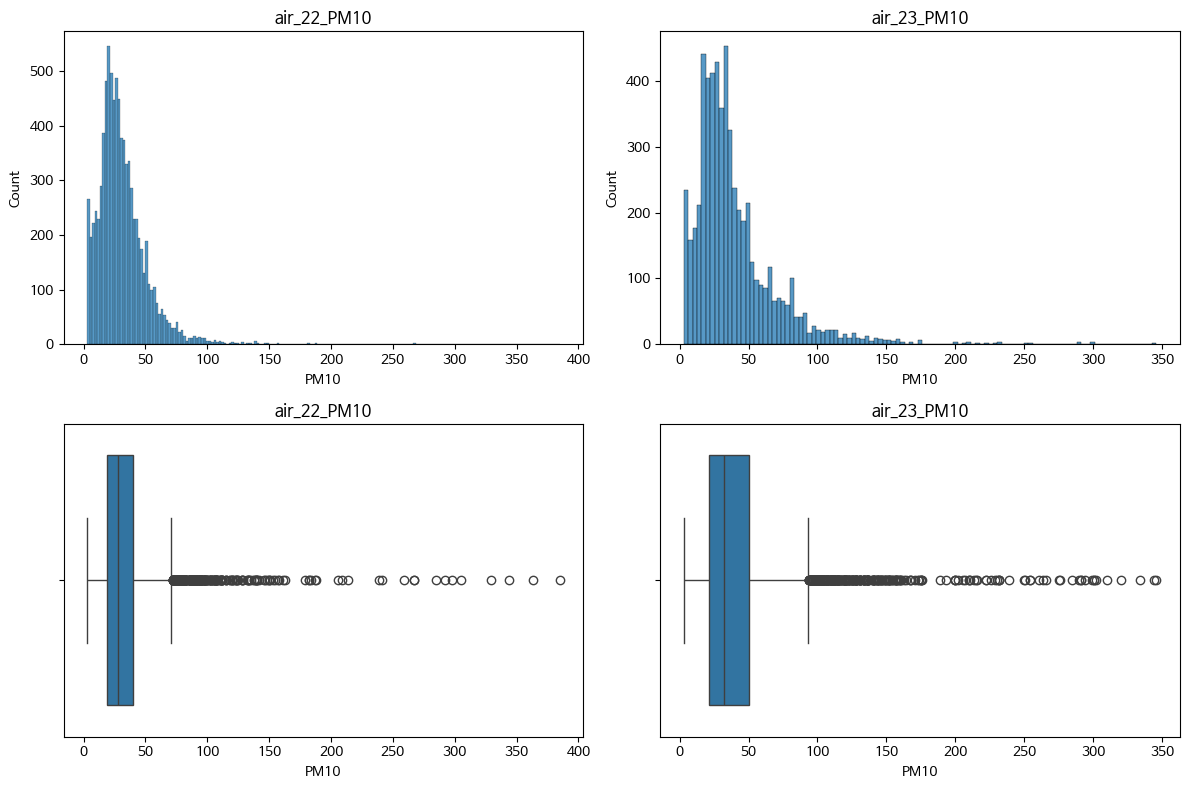

In [14]:
# 고민하고 확인해봅시다.
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data = air_22, x = 'PM10')
plt.title('air_22_PM10')

plt.subplot(2, 2, 2)
sns.histplot(data = air_23, x = 'PM10')
plt.title('air_23_PM10')

plt.subplot(2, 2, 3)
sns.boxplot(data = air_22, x = 'PM10')
plt.title('air_22_PM10')

plt.subplot(2, 2, 4)
sns.boxplot(data = air_23, x = 'PM10')
plt.title('air_23_PM10')

plt.tight_layout()
plt.show()

**6. 위 정보로 부터 파악한 내용 정리**

* 결측치가 존재한다.
* PM10의 분포는 오른쪽으로 꼬리가 긴 형태의 분포를 가진 수치형 데이터이다.
* boxplot을 통하여 이상치가 존재하는 것을 확인하였다.

-----------**아래에 추가로 3-4개의 변수를 같은 방법으로 고민해보기!** -----------------------

#### **1) Feature1 : PM2.5**

**1. 변수가 내포하고 있는 의미**

초미세먼지(PM2.5)

**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [15]:
# 고민하고 확인해봅시다.
display(air_22['PM25'].isna().sum())
display(air_23['PM25'].isna().sum())

# 예측해야하는 값이므로, 시계열 시각화, 다른 변수들간의 확인을 통해 결측치 처리 필요

105

39

**4.변수의 기초 통계량 확인**

In [16]:
# 고민하고 확인해봅시다.
display(air_22['PM25'].describe())
print('=' * 30)
display(air_23['PM25'].describe())

count    8655.000000
mean       19.284575
std        14.172678
min         1.000000
25%        10.000000
50%        16.000000
75%        25.000000
max       121.000000
Name: PM25, dtype: float64

count    5793.000000
mean       20.727257
std        16.573257
min         1.000000
25%        10.000000
50%        17.000000
75%        26.000000
max       142.000000
Name: PM25, dtype: float64

**5. 변수의 분포 확인**

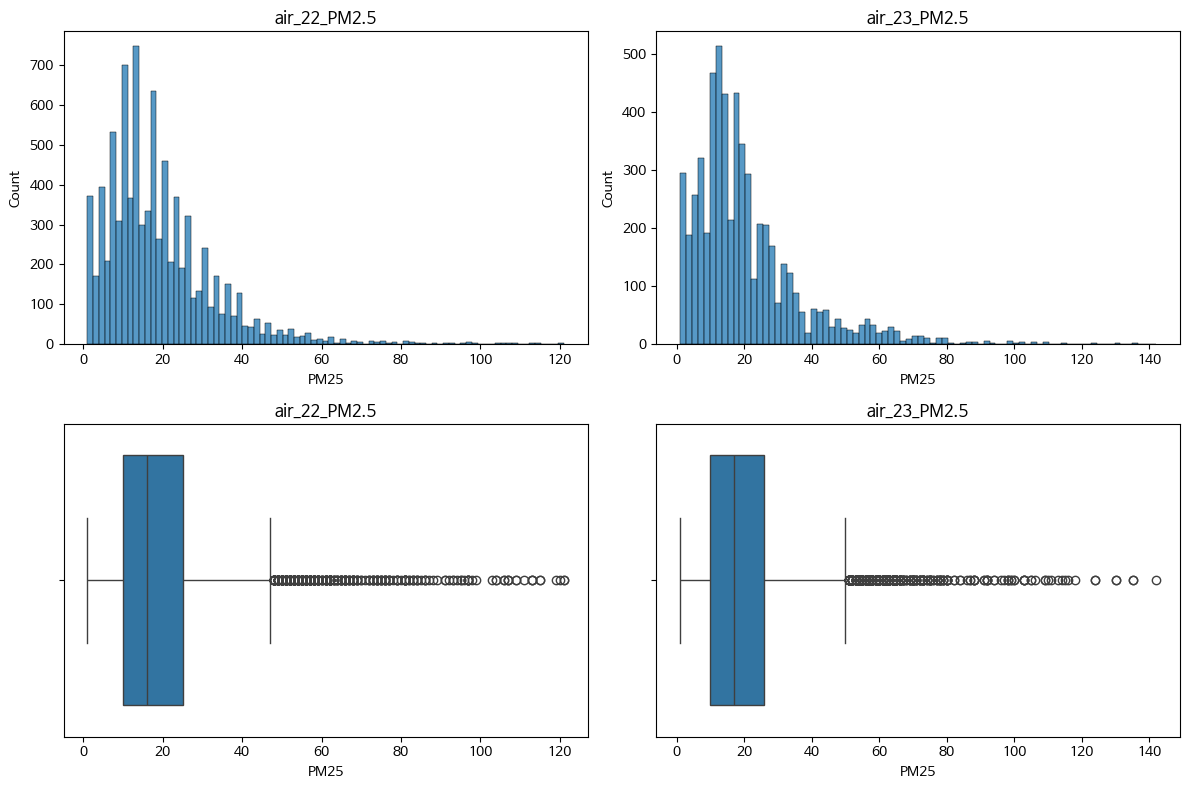

In [17]:
# 고민하고 확인해봅시다.
plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data = air_22, x = 'PM25')
plt.title('air_22_PM2.5')

plt.subplot(2, 2, 2)
sns.histplot(data = air_23, x = 'PM25')
plt.title('air_23_PM2.5')

plt.subplot(2, 2, 3)
sns.boxplot(data = air_22, x = 'PM25')
plt.title('air_22_PM2.5')

plt.subplot(2, 2, 4)
sns.boxplot(data = air_23, x = 'PM25')
plt.title('air_23_PM2.5')

plt.tight_layout()
plt.show()

**6. 위 정보로 부터 파악한 내용 정리**

* 결측치가 존재한다.
* PM25의 분포는 오른쪽으로 꼬리가 긴 형태의 분포를 가진 수치형 데이터이다.
* boxplot을 통하여 이상치가 존재하는 것을 확인하였다.

-----------**아래에 추가로 3-4개의 변수를 같은 방법으로 고민해보기!** -----------------------

#### **1) Feature1 : 기온**

**1. 변수가 내포하고 있는 의미**

1시간별 서울 기온

**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [18]:
# 고민하고 확인해봅시다.
display(weather_22['기온(°C)'].isna().sum())
display(weather_23['기온(°C)'].isna().sum())

0

0

**4.변수의 기초 통계량 확인**

In [19]:
# 고민하고 확인해봅시다.
display(weather_22['기온(°C)'].describe())
display(weather_23['기온(°C)'].describe())


count    8760.000000
mean       13.293687
std        11.336825
min       -13.700000
25%         4.200000
50%        14.800000
75%        23.200000
max        35.600000
Name: 기온(°C), dtype: float64

count    5832.000000
mean       15.269462
std        11.100204
min       -17.200000
25%         6.100000
50%        17.600000
75%        24.800000
max        35.800000
Name: 기온(°C), dtype: float64

**5. 변수의 분포 확인**

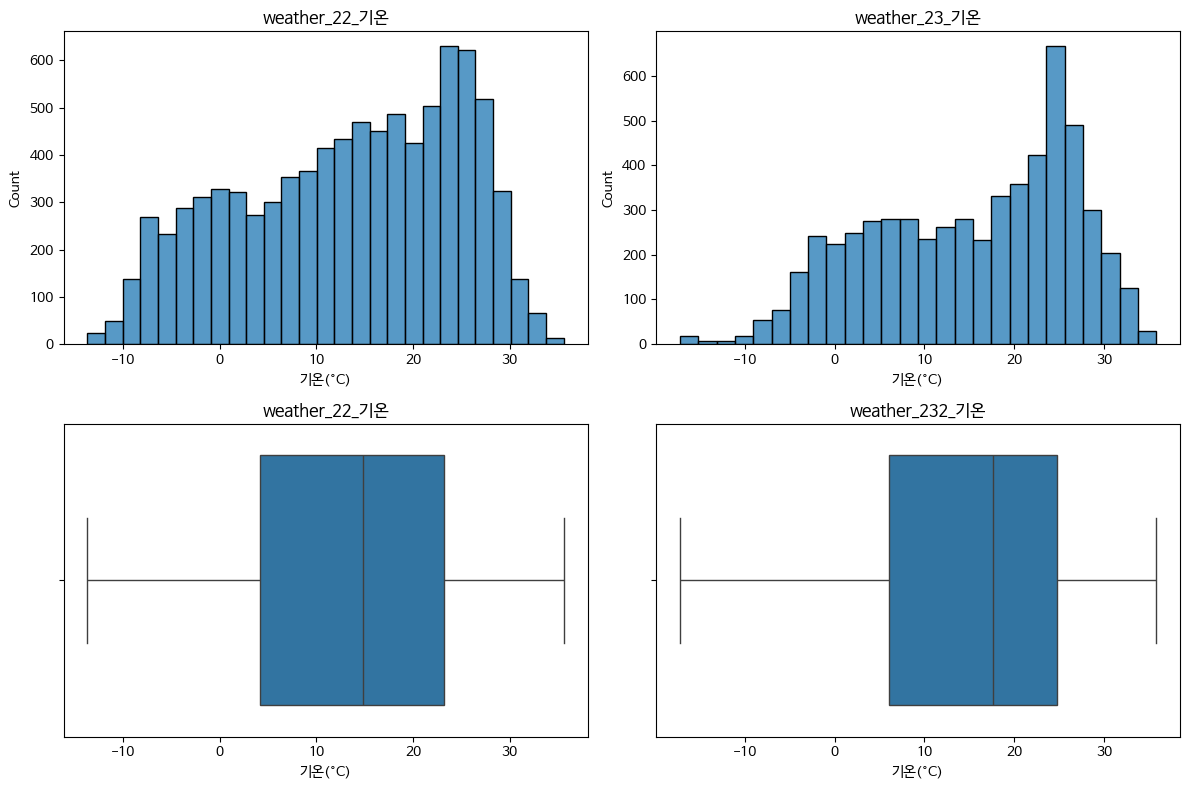

In [20]:
# 고민하고 확인해봅시다.

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data = weather_22, x = '기온(°C)')
plt.title('weather_22_기온')

plt.subplot(2, 2, 2)
sns.histplot(data = weather_23, x = '기온(°C)')
plt.title('weather_23_기온')

plt.subplot(2, 2, 3)
sns.boxplot(data = weather_22, x = '기온(°C)')
plt.title('weather_22_기온')

plt.subplot(2, 2, 4)
sns.boxplot(data = weather_23, x = '기온(°C)')
plt.title('weather_232_기온')

plt.tight_layout()
plt.show()

**6. 위 정보로 부터 파악한 내용 정리**

* 결측치가 존재하지 않는다.

-----------**아래에 추가로 3-4개의 변수를 같은 방법으로 고민해보기!** -----------------------

#### **1) Feature1 : 이슬점온도**

**1. 변수가 내포하고 있는 의미**

1시간별 이슬점 온도

**2. 변수가 수치형인지 범주형인지**
  - 날짜는 범주형? 수치형?

수치형

**3. 변수의 결측치 존재 여부 및 조치 방안**

In [21]:
# 고민하고 확인해봅시다.
display(weather_22['이슬점온도(°C)'].isna().sum())
display(weather_23['이슬점온도(°C)'].isna().sum())

0

0

**4.변수의 기초 통계량 확인**

In [22]:
# 고민하고 확인해봅시다.
display(weather_22['이슬점온도(°C)'].describe())
display(weather_23['이슬점온도(°C)'].describe())


count    8760.000000
mean        6.184760
std        12.514194
min       -22.900000
25%        -3.600000
50%         7.100000
75%        16.700000
max        26.800000
Name: 이슬점온도(°C), dtype: float64

count    5832.000000
mean        8.181944
std        12.398161
min       -26.200000
25%        -2.200000
50%         8.750000
75%        20.800000
max        26.600000
Name: 이슬점온도(°C), dtype: float64

**5. 변수의 분포 확인**

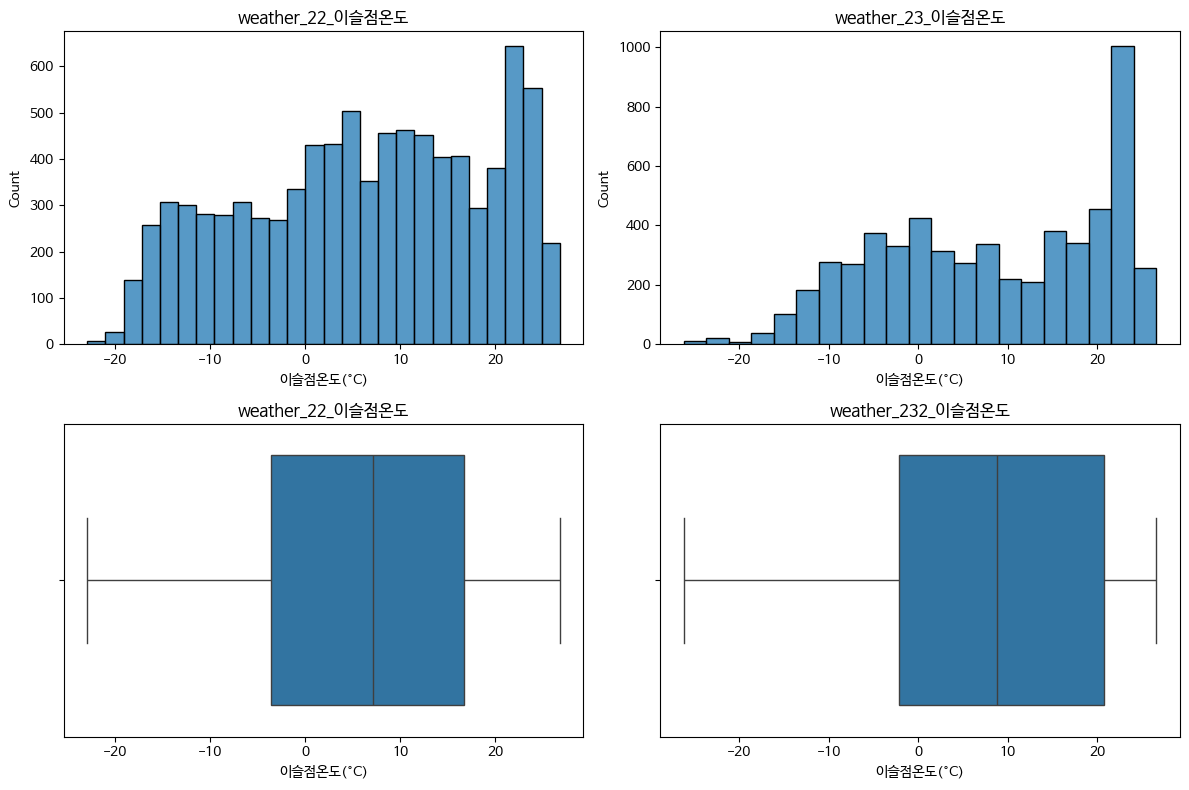

In [23]:
# 고민하고 확인해봅시다.

plt.figure(figsize = (12, 8))
plt.subplot(2, 2, 1)
sns.histplot(data = weather_22, x = '이슬점온도(°C)')
plt.title('weather_22_이슬점온도')

plt.subplot(2, 2, 2)
sns.histplot(data = weather_23, x = '이슬점온도(°C)')
plt.title('weather_23_이슬점온도')

plt.subplot(2, 2, 3)
sns.boxplot(data = weather_22, x = '이슬점온도(°C)')
plt.title('weather_22_이슬점온도')

plt.subplot(2, 2, 4)
sns.boxplot(data = weather_23, x = '이슬점온도(°C)')
plt.title('weather_232_이슬점온도')

plt.tight_layout()
plt.show()

**6. 위 정보로 부터 파악한 내용 정리**

* 결측치가 존재하지 않는다

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_22, air_23, weather_22, weather_23 데이터 전처리
* air_22, air_23  각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_22['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### 1) air_22, air_23 의 '측정일시'를 활용하여 'time' 변수 생성

In [30]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

air_22['time'] = pd.to_datetime(air_22['측정일시'] - 1, format = '%Y%m%d%H')
air_23['time'] = pd.to_datetime(air_23['측정일시'] - 1, format = '%Y%m%d%H')

In [31]:
# 결과확인
display(air_22.head())
display(air_23.head())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19,2022-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19,2022-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19,2022-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19,2022-01-01 04:00:00


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2023010101,0.005,1.4,0.002,0.064,68.0,58.0,서울 종로구 종로35가길 19,2023-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2023010102,0.004,1.4,0.002,0.061,64.0,50.0,서울 종로구 종로35가길 19,2023-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2023010103,0.004,1.0,0.002,0.051,67.0,56.0,서울 종로구 종로35가길 19,2023-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2023010104,0.004,0.7,0.012,0.030,76.0,64.0,서울 종로구 종로35가길 19,2023-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2023010105,0.004,0.7,0.021,0.017,81.0,64.0,서울 종로구 종로35가길 19,2023-01-01 04:00:00


#### 2) weather_22, weather_23 의 '일시'를 활용하여 'time' 변수 생성
* weather_22, weather_23 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [32]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.

weather_22['time'] = pd.to_datetime(weather_22['일시'])
weather_23['time'] = pd.to_datetime(weather_23['일시'])


In [33]:
# 결과확인
display(weather_22.head())
display(weather_23.head())

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0,2022-01-01 00:00:00
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0,2022-01-01 01:00:00
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0,2022-01-01 02:00:00
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0,2022-01-01 03:00:00
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0,2022-01-01 04:00:00


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2023-01-01 0:00,0.9,NaN,NaN,9.0,1.4,NaN,200,...,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6,2023-01-01 00:00:00
1,108,서울,2023-01-01 1:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 01:00:00
2,108,서울,2023-01-01 2:00,1.5,NaN,NaN,NaN,1.9,NaN,250,...,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 02:00:00
3,108,서울,2023-01-01 3:00,1.6,NaN,NaN,NaN,1.6,NaN,250,...,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6,2023-01-01 03:00:00
4,108,서울,2023-01-01 4:00,1.5,NaN,NaN,NaN,1.4,NaN,290,...,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6,2023-01-01 04:00:00


#### 3) 'time' 기준으로 데이터 합치기
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_22에는 'time' 기준으로 22년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_23에는 'time' 기준으로 23년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [34]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_22 = pd.merge(air_22, weather_22, on = 'time')
df_23 = pd.merge(air_23, weather_23, on = 'time')

In [35]:
# 결과확인

display(df_22.head())
display(df_23.head())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,서울 종로구,도시대기,111123,종로구,2023010101,0.005,1.4,0.002,0.064,68.0,...,NaN,1503,NaN,NaN,-1.6,NaN,-0.3,-0.6,-0.5,0.6
1,서울 종로구,도시대기,111123,종로구,2023010102,0.004,1.4,0.002,0.061,64.0,...,12.0,1104,NaN,NaN,-1.4,NaN,-0.3,-0.5,-0.5,0.6
2,서울 종로구,도시대기,111123,종로구,2023010103,0.004,1.0,0.002,0.051,67.0,...,11.0,925,NaN,40.0,-1.6,NaN,-0.3,-0.5,-0.5,0.6
3,서울 종로구,도시대기,111123,종로구,2023010104,0.004,0.7,0.012,0.030,76.0,...,16.0,794,NaN,40.0,-1.8,NaN,-0.3,-0.5,-0.5,0.6
4,서울 종로구,도시대기,111123,종로구,2023010105,0.004,0.7,0.021,0.017,81.0,...,10.0,709,NaN,40.0,-1.3,NaN,-0.2,-0.5,-0.5,0.6


#### 4) 사용하지 않을 변수 제거

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_22, df_23에 여러분들이 사용할 변수들만 넣어보세요.
* time 변수를 index로 세팅하고 (set_index) 데이터가 정렬되어 있지 않으므로 index 기준으로 정렬하세요. (sort_index)

In [36]:
df_22.head(4).T

,0,1,2,3
지역,서울 종로구,서울 종로구,서울 종로구,서울 종로구
망,도시대기,도시대기,도시대기,도시대기
측정소코드,111123,111123,111123,111123
측정소명,종로구,종로구,종로구,종로구
측정일시,2022010101,2022010102,2022010103,2022010104
SO2,0.003,0.003,0.003,0.003
CO,0.4,0.4,0.5,0.5
O3,0.026,0.022,0.014,0.016
NO2,0.016,0.02,0.028,0.027
PM10,23.0,20.0,20.0,19.0


In [37]:
# df_22, df_23에 사용할 변수들만 할당
selected_cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25',  'time', '기온(°C)',
                 '강수량(mm)', '풍속(m/s)', '풍향(16방위)',
                 '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '일조(hr)', '일사(MJ/m2)',
                 '적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '최저운고(100m )', '시정(10m)',
                 '지면온도(°C)', '5cm 지중온도(°C)']

df_22_1 = df_22.loc[:, selected_cols].copy()
df_23_1 = df_23.loc[:, selected_cols].copy()

In [38]:
# time 변수를 index로 세팅
df_22_1.set_index('time', inplace = True)
df_23_1.set_index('time', inplace = True)

#### 5) 변수들의 결측치 처리

In [39]:
# df_22, df_23의 결측치 확인
display(df_22_1.isna().sum())
print('=' * 30)
display(df_23_1.isna().sum())

SO2               87
CO                87
O3                87
NO2               87
PM10             156
PM25             105
기온(°C)             0
강수량(mm)         7821
풍속(m/s)            0
풍향(16방위)           0
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
일조(hr)          3969
일사(MJ/m2)       3969
적설(cm)          8271
전운량(10분위)          0
중하층운량(10분위)        0
최저운고(100m )     4305
시정(10m)            0
지면온도(°C)           1
5cm 지중온도(°C)       1
dtype: int64

SO2              244
CO                34
O3                61
NO2               34
PM10              40
PM25              39
기온(°C)             0
강수량(mm)         5023
풍속(m/s)            0
풍향(16방위)           0
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
일조(hr)          2489
일사(MJ/m2)       2489
적설(cm)          5756
전운량(10분위)          0
중하층운량(10분위)        0
최저운고(100m )     2689
시정(10m)            0
지면온도(°C)           0
5cm 지중온도(°C)       0
dtype: int64

##### SO2, CO. O3, NO2, PM10, PM25 결측치 확인 및 처리

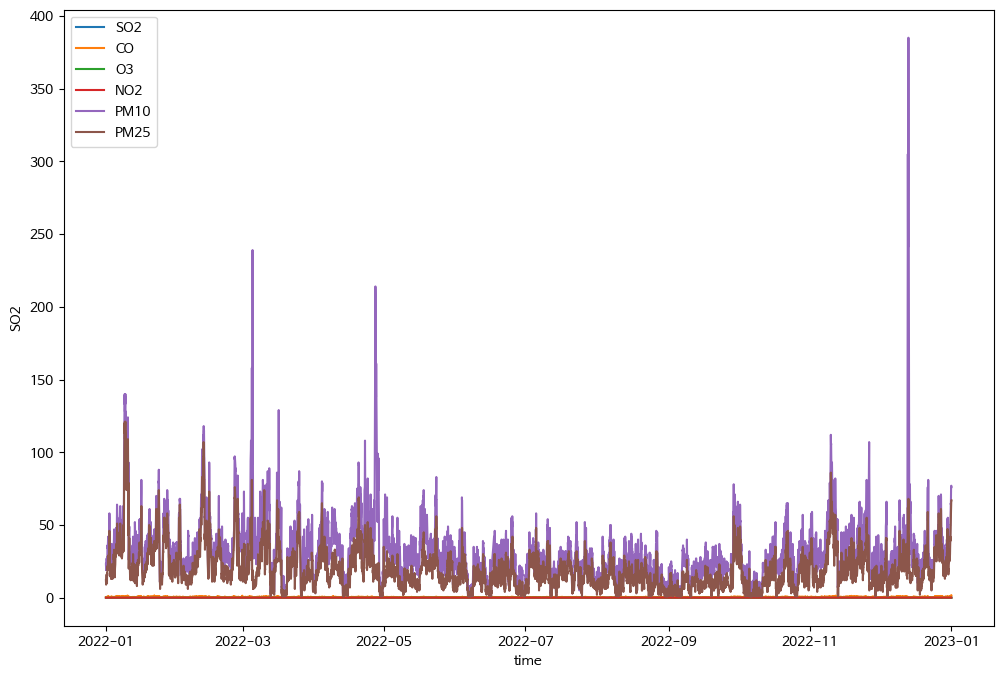

In [40]:
air_cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

plt.figure(figsize = (12, 8))
for col in air_cols:
    sns.lineplot(data = df_22_1, x = df_22_1.index, y = col, label = col)

plt.legend()
plt.show()

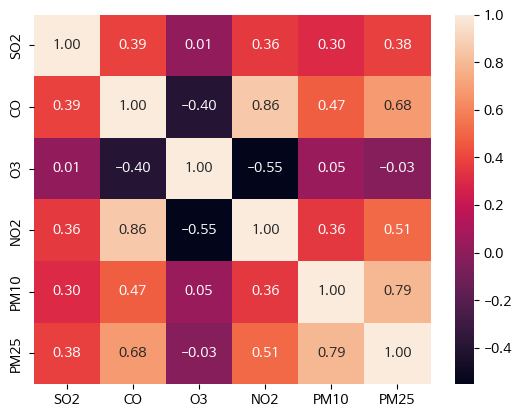

In [41]:
sns.heatmap(data = df_22_1[air_cols].corr(),
            annot = True,
            fmt = '.2f')
plt.show()

<Axes: xlabel='time'>

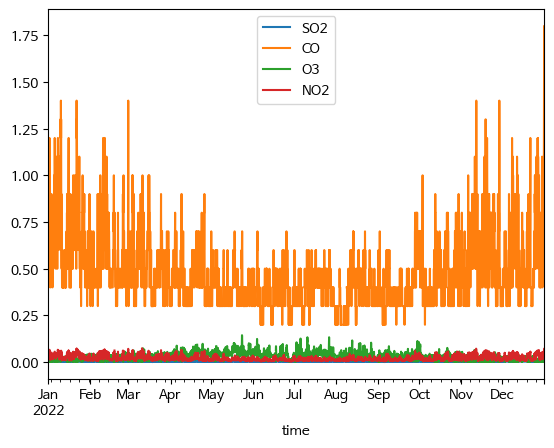

In [42]:
df_22_1[air_cols[:4]].plot(kind = 'line')

In [43]:
df_22_1['SO2'].describe()

count    8673.000000
mean        0.003133
std         0.000700
min         0.001000
25%         0.003000
50%         0.003000
75%         0.003000
max         0.008000
Name: SO2, dtype: float64

In [44]:
df_22_1[air_cols].describe()

,SO2,CO,O3,NO2,PM10,PM25
count,8673.000000,8673.000000,8673.000000,8673.000000,8604.000000,8655.000000
mean,0.003133,0.473458,0.030759,0.021319,31.756044,19.284575
std,0.000700,0.183086,0.019796,0.013473,22.466954,14.172678
min,0.001000,0.200000,0.001000,0.003000,3.000000,1.000000
25%,0.003000,0.400000,0.017000,0.011000,19.000000,10.000000
50%,0.003000,0.400000,0.029000,0.017000,28.000000,16.000000
75%,0.003000,0.500000,0.042000,0.028000,40.000000,25.000000
max,0.008000,1.800000,0.144000,0.074000,385.000000,121.000000


In [45]:
df_22_1[air_cols] = df_22_1[air_cols].interpolate()
df_23_1[air_cols] = df_23_1[air_cols].interpolate()

In [46]:
# O3 컬럼은 삭제.
df_22_1.drop(columns = 'O3', axis = 1, inplace = True)
df_23_1.drop(columns = 'O3', axis = 1, inplace = True)

<Axes: >

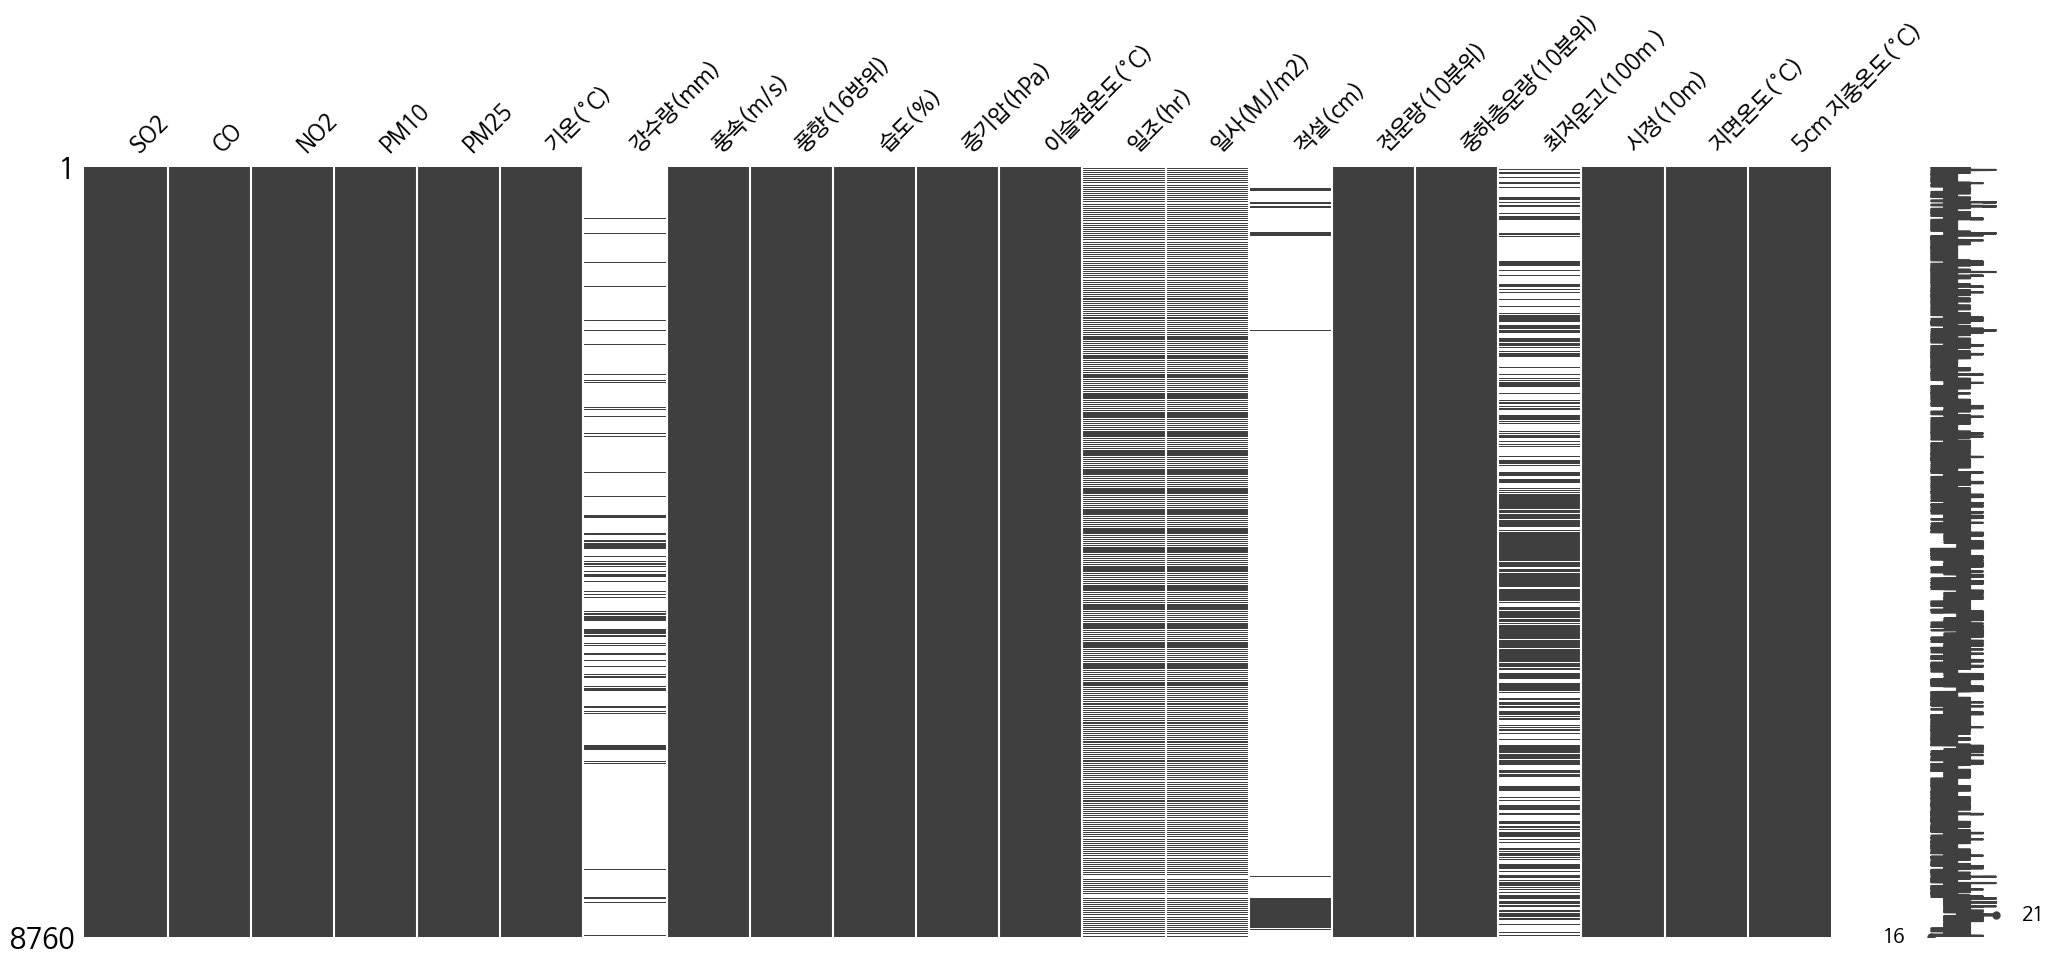

In [47]:
import missingno as msno
msno.matrix(df_22_1)

In [48]:
# df_22, df_23의 결측치 확인
display(df_22_1.isna().sum())
print('=' * 30)
display(df_23_1.isna().sum())

SO2                0
CO                 0
NO2                0
PM10               0
PM25               0
기온(°C)             0
강수량(mm)         7821
풍속(m/s)            0
풍향(16방위)           0
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
일조(hr)          3969
일사(MJ/m2)       3969
적설(cm)          8271
전운량(10분위)          0
중하층운량(10분위)        0
최저운고(100m )     4305
시정(10m)            0
지면온도(°C)           1
5cm 지중온도(°C)       1
dtype: int64

SO2                0
CO                 0
NO2                0
PM10               0
PM25               0
기온(°C)             0
강수량(mm)         5023
풍속(m/s)            0
풍향(16방위)           0
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
일조(hr)          2489
일사(MJ/m2)       2489
적설(cm)          5756
전운량(10분위)          0
중하층운량(10분위)        0
최저운고(100m )     2689
시정(10m)            0
지면온도(°C)           0
5cm 지중온도(°C)       0
dtype: int64

##### 적설, 강수량, 일조, 일사 결측치 처리

In [49]:
for col in ['적설(cm)', '강수량(mm)','일조(hr)','일사(MJ/m2)']:
  df_22_1[col].fillna(0, inplace=True)
  df_23_1[col].fillna(0, inplace=True)

In [50]:
df_22_1.isna().sum()

SO2                0
CO                 0
NO2                0
PM10               0
PM25               0
기온(°C)             0
강수량(mm)            0
풍속(m/s)            0
풍향(16방위)           0
습도(%)              0
증기압(hPa)           0
이슬점온도(°C)          0
일조(hr)             0
일사(MJ/m2)          0
적설(cm)             0
전운량(10분위)          0
중하층운량(10분위)        0
최저운고(100m )     4305
시정(10m)            0
지면온도(°C)           1
5cm 지중온도(°C)       1
dtype: int64

##### 최저운고 결측치 처리 및 확인

<Axes: xlabel='time'>

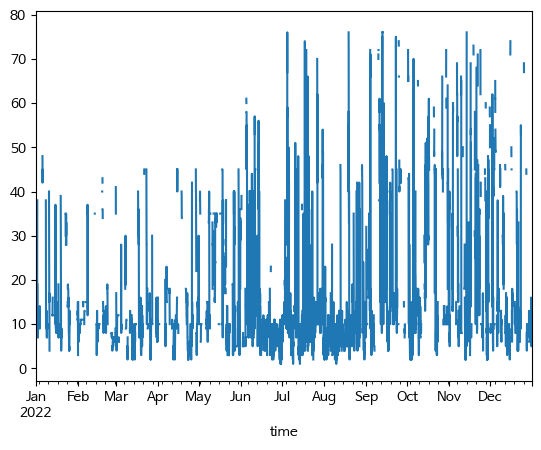

In [51]:
df_22_1['최저운고(100m )'].plot(kind = 'line')

<Axes: >

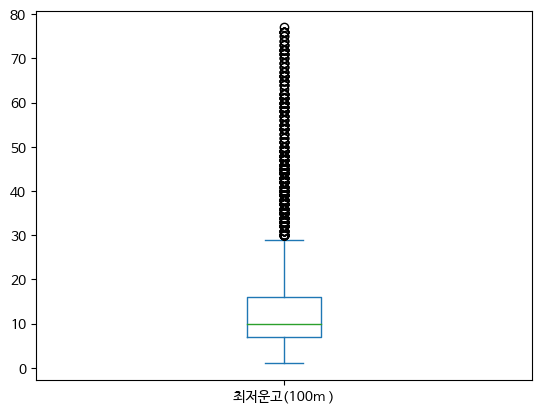

In [52]:
df_22_1['최저운고(100m )'].plot(kind = 'box')

In [53]:
# 시간이 흘러감에 따라서 이전 값에 영향이 있을 것이라 판단.
df_22_1['최저운고(100m )'].fillna(method = 'ffill', inplace = True)
df_23_1['최저운고(100m )'].fillna(method = 'ffill', inplace = True)

# 이후 남은 결측치 이후 값으로 처리
df_22_1['최저운고(100m )'].fillna(method = 'bfill', inplace = True)
df_23_1['최저운고(100m )'].fillna(method = 'bfill', inplace = True)

##### 지면온도, 5cm 지중온도 결측치 처리

In [54]:
df_22_1.head()

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,이슬점온도(°C),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,...,-19.4,0.0,0.0,0.0,0,0,35.0,2000,-7.0,-1.0
2022-01-01 01:00:00,0.003,0.4,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,...,-19.7,0.0,0.0,0.0,0,0,35.0,2000,-7.2,-1.1
2022-01-01 02:00:00,0.003,0.5,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,...,-19.7,0.0,0.0,0.0,0,0,35.0,2000,-7.5,-1.3
2022-01-01 03:00:00,0.003,0.5,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,...,-18.8,0.0,0.0,0.0,0,0,35.0,2000,-7.6,-1.4
2022-01-01 04:00:00,0.003,0.5,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,...,-18.5,0.0,0.0,0.0,0,0,35.0,2000,-7.6,-1.4


In [55]:
df_23_1[df_23_1['지면온도(°C)'].isna()]

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,이슬점온도(°C),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C)
time,,,,,,,,,,,,,,,,,,,,,


In [56]:
df_22_1['지면온도(°C)'].fillna(method = 'ffill', inplace = True)
df_23_1['지면온도(°C)'].fillna(method = 'ffill', inplace = True)
df_22_1['5cm 지중온도(°C)'].fillna(method = 'ffill', inplace = True)
df_23_1['5cm 지중온도(°C)'].fillna(method = 'ffill', inplace = True)

In [57]:
# df_22, df_23의 변수 중 결측치를 처리(결측치 처리 방법은 다양!)
# 선택해서 결측치를 처리해보세요.



In [58]:
# df_22, df_23의 결측치 처리 후 재확인 해보기
df_22 = df_22_1.copy()
df_23 = df_23_1.copy()

display(df_22.isna().sum())
display(df_23.isna().sum())


SO2             0
CO              0
NO2             0
PM10            0
PM25            0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
풍향(16방위)        0
습도(%)           0
증기압(hPa)        0
이슬점온도(°C)       0
일조(hr)          0
일사(MJ/m2)       0
적설(cm)          0
전운량(10분위)       0
중하층운량(10분위)     0
최저운고(100m )     0
시정(10m)         0
지면온도(°C)        0
5cm 지중온도(°C)    0
dtype: int64

SO2             0
CO              0
NO2             0
PM10            0
PM25            0
기온(°C)          0
강수량(mm)         0
풍속(m/s)         0
풍향(16방위)        0
습도(%)           0
증기압(hPa)        0
이슬점온도(°C)       0
일조(hr)          0
일사(MJ/m2)       0
적설(cm)          0
전운량(10분위)       0
중하층운량(10분위)     0
최저운고(100m )     0
시정(10m)         0
지면온도(°C)        0
5cm 지중온도(°C)    0
dtype: int64

#### 6) 전일 같은 시간 미세먼지 농도 변수 추가

* 먼저 df_22, df_23에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [59]:
# df_22, df_23의 index(time)를 month, day, hour 로 쪼개기 (year는 필요 없음).
df_22['month'] = df_22.index.month
df_23['month'] = df_23.index.month

df_22['day'] = df_22.index.day
df_23['day'] = df_23.index.day

df_22['hour'] = df_22.index.hour
df_23['hour'] = df_23.index.hour


In [60]:
# 확인해보기
df_22.head()

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,적설(cm),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,...,0.0,0,0,35.0,2000,-7.0,-1.0,1,1,0
2022-01-01 01:00:00,0.003,0.4,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,...,0.0,0,0,35.0,2000,-7.2,-1.1,1,1,1
2022-01-01 02:00:00,0.003,0.5,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,...,0.0,0,0,35.0,2000,-7.5,-1.3,1,1,2
2022-01-01 03:00:00,0.003,0.5,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,...,0.0,0,0,35.0,2000,-7.6,-1.4,1,1,3
2022-01-01 04:00:00,0.003,0.5,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,...,0.0,0,0,35.0,2000,-7.6,-1.4,1,1,4


In [61]:
# df_22, df_23에 전일 같은 시간 미세먼지 농도 변수 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)

df_22['전일_미세먼지_농도_변수'] = df_22['PM10'].shift(24)
df_23['전일_미세먼지_농도_변수'] = df_23['PM10'].shift(24)

In [62]:
#확인해보기
df_22.head(30)

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour,전일_미세먼지_농도_변수
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,...,0,0,35.0,2000,-7.0,-1.0,1,1,0,NaN
2022-01-01 01:00:00,0.003,0.4,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,...,0,0,35.0,2000,-7.2,-1.1,1,1,1,NaN
2022-01-01 02:00:00,0.003,0.5,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,...,0,0,35.0,2000,-7.5,-1.3,1,1,2,NaN
2022-01-01 03:00:00,0.003,0.5,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,...,0,0,35.0,2000,-7.6,-1.4,1,1,3,NaN
2022-01-01 04:00:00,0.003,0.5,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,...,0,0,35.0,2000,-7.6,-1.4,1,1,4,NaN
2022-01-01 05:00:00,0.003,0.6,0.045,19.0,11.0,-9.7,0.0,0.8,270,51,...,0,0,35.0,2000,-7.7,-1.5,1,1,5,NaN
2022-01-01 06:00:00,0.003,0.6,0.044,24.0,14.0,-9.8,0.0,1.9,20,53,...,0,0,35.0,2000,-7.6,-1.6,1,1,6,NaN
2022-01-01 07:00:00,0.003,0.6,0.042,27.0,16.0,-10.1,0.0,1.9,50,55,...,0,0,35.0,2000,-7.6,-1.6,1,1,7,NaN
2022-01-01 08:00:00,0.003,0.6,0.038,26.0,12.0,-10.2,0.0,2.5,20,56,...,0,0,35.0,2000,-7.4,-1.7,1,1,8,NaN


#### 7) t+1 시점의 미세먼지 농도 데이터 생성
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [63]:
# df_22, df_23에 t+1 시점 변수(PM10_1) 추가
# shift 함수 활용 해보기!

df_22['PM10_1'] = df_22['PM10'].shift(-1)
df_23['PM10_1'] = df_23['PM10'].shift(-1)

In [64]:
#확인해보기!
df_22.head()

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour,전일_미세먼지_농도_변수,PM10_1
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,...,0,35.0,2000,-7.0,-1.0,1,1,0,NaN,20.0
2022-01-01 01:00:00,0.003,0.4,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,...,0,35.0,2000,-7.2,-1.1,1,1,1,NaN,20.0
2022-01-01 02:00:00,0.003,0.5,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,...,0,35.0,2000,-7.5,-1.3,1,1,2,NaN,19.0
2022-01-01 03:00:00,0.003,0.5,0.027,19.0,10.0,-9.3,0.0,1.4,290,46,...,0,35.0,2000,-7.6,-1.4,1,1,3,NaN,24.0
2022-01-01 04:00:00,0.003,0.5,0.040,24.0,11.0,-9.6,0.0,1.7,340,48,...,0,35.0,2000,-7.6,-1.4,1,1,4,NaN,19.0


In [65]:
df_23.head()

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour,전일_미세먼지_농도_변수,PM10_1
time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.005,1.4,0.064,68.0,58.0,0.9,0.0,1.4,200,72,...,9,12.0,1503,-1.6,-0.3,1,1,0,NaN,64.0
2023-01-01 01:00:00,0.004,1.4,0.061,64.0,50.0,1.5,0.0,1.9,250,71,...,6,12.0,1104,-1.4,-0.3,1,1,1,NaN,67.0
2023-01-01 02:00:00,0.004,1.0,0.051,67.0,56.0,1.5,0.0,1.9,250,72,...,8,11.0,925,-1.6,-0.3,1,1,2,NaN,76.0
2023-01-01 03:00:00,0.004,0.7,0.030,76.0,64.0,1.6,0.0,1.6,250,74,...,8,16.0,794,-1.8,-0.3,1,1,3,NaN,81.0
2023-01-01 04:00:00,0.004,0.7,0.017,81.0,64.0,1.5,0.0,1.4,290,74,...,9,10.0,709,-1.3,-0.2,1,1,4,NaN,64.0


In [66]:
# 결측치가 있다면 처리하고 확인해보기!
display(df_22.isna().sum())
display(df_23.isna().sum())

SO2               0
CO                0
NO2               0
PM10              0
PM25              0
기온(°C)            0
강수량(mm)           0
풍속(m/s)           0
풍향(16방위)          0
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
일조(hr)            0
일사(MJ/m2)         0
적설(cm)            0
전운량(10분위)         0
중하층운량(10분위)       0
최저운고(100m )       0
시정(10m)           0
지면온도(°C)          0
5cm 지중온도(°C)      0
month             0
day               0
hour              0
전일_미세먼지_농도_변수    24
PM10_1            1
dtype: int64

SO2               0
CO                0
NO2               0
PM10              0
PM25              0
기온(°C)            0
강수량(mm)           0
풍속(m/s)           0
풍향(16방위)          0
습도(%)             0
증기압(hPa)          0
이슬점온도(°C)         0
일조(hr)            0
일사(MJ/m2)         0
적설(cm)            0
전운량(10분위)         0
중하층운량(10분위)       0
최저운고(100m )       0
시정(10m)           0
지면온도(°C)          0
5cm 지중온도(°C)      0
month             0
day               0
hour              0
전일_미세먼지_농도_변수    24
PM10_1            1
dtype: int64

In [67]:
df_22['전일_미세먼지_농도_변수'].fillna(method = 'bfill', inplace = True)
df_23['전일_미세먼지_농도_변수'].fillna(method = 'bfill', inplace = True)
df_22['PM10_1'].fillna(method = 'ffill', inplace = True)
df_23['PM10_1'].fillna(method = 'ffill', inplace = True)

### (2) train, test 데이터 분리 및 저장

* 22년도 데이터(df_22)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 23년도 데이터(df_23)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.

In [68]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
train = df_22.copy()
test = df_23.copy()

y = 'PM10_1'

train_x = train.drop(columns = y, axis = 1)
train_y = train.loc[:, y]

test_x = test.drop(columns = y, axis = 1)
test_y = test.loc[:, y]

In [69]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)

train_x.to_csv(path + 'train_x.csv', index = False)
train_y.to_csv(path + 'train_y.csv', index = False)
test_x.to_csv(path + 'test_x.csv', index = False)
test_y.to_csv(path + 'test_y.csv', index = False)


In [70]:
display(train_x.head(3))
display(train_y.head(3))
display(test_x.head(3))
display(test_y.head(3))

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour,전일_미세먼지_농도_변수
time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,0.003,0.4,0.016,23.0,12.0,-8.5,0.0,1.9,320,41,...,0,0,35.0,2000,-7.0,-1.0,1,1,0,23.0
2022-01-01 01:00:00,0.003,0.4,0.020,20.0,9.0,-9.2,0.0,1.8,270,42,...,0,0,35.0,2000,-7.2,-1.1,1,1,1,23.0
2022-01-01 02:00:00,0.003,0.5,0.028,20.0,9.0,-9.5,0.0,1.2,270,43,...,0,0,35.0,2000,-7.5,-1.3,1,1,2,23.0


time
2022-01-01 00:00:00    20.0
2022-01-01 01:00:00    20.0
2022-01-01 02:00:00    19.0
Name: PM10_1, dtype: float64

,SO2,CO,NO2,PM10,PM25,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),...,전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C),5cm 지중온도(°C),month,day,hour,전일_미세먼지_농도_변수
time,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.005,1.4,0.064,68.0,58.0,0.9,0.0,1.4,200,72,...,9,9,12.0,1503,-1.6,-0.3,1,1,0,68.0
2023-01-01 01:00:00,0.004,1.4,0.061,64.0,50.0,1.5,0.0,1.9,250,71,...,6,6,12.0,1104,-1.4,-0.3,1,1,1,68.0
2023-01-01 02:00:00,0.004,1.0,0.051,67.0,56.0,1.5,0.0,1.9,250,72,...,9,8,11.0,925,-1.6,-0.3,1,1,2,68.0


time
2023-01-01 00:00:00    64.0
2023-01-01 01:00:00    67.0
2023-01-01 02:00:00    76.0
Name: PM10_1, dtype: float64

# 고생하셨습니다👍👍